# Part 1: Peak Analysis

In [111]:
import pandas as pd
data=pd.read_csv('minutely_power.csv')
data.rename(columns={'Unnamed: 0':'time'}, inplace=True)
data.head(2)

,time,8576,8577,8578,8579,8580,8595,8596,8597,8604,...,7150,7151,7152,8565,8566,8567,8568,8570,8572,8575
0,2016-07-27 03:01:00+00:00,2600.0,2809.999756,1691.041382,1452.576050,1304.252808,2240.0,2809.999756,2619.999756,339.0,...,5619.999512,6120.0,5729.999512,5740.0,7770.0,6150.0,12456.911133,12848.047852,12748.053711,2650.0
1,2016-07-27 03:02:00+00:00,2600.0,2809.999756,74.076866,-109.096542,339.914764,2240.0,2809.999756,2619.999756,339.0,...,5619.999512,6120.0,5729.999512,5740.0,7770.0,6150.0,2600.000000,2630.000000,2830.000000,2650.0


# No Missing Values

In [2]:
(data.isnull().sum()!=0).sum()

0

# Aggregate every 15 mins and get the avereage total watts in each 15 mins

In [3]:
data['time']=pd.to_datetime(data['time'])
original = data.set_index('time')
original.head(2)

In [6]:
fifteen_min=original.groupby(pd.TimeGrouper(freq='15Min')).sum()
fifteen_min.head(2)

,8576,8577,8578,8579,8580,8595,8596,8597,8604,8605,...,7150,7151,7152,8565,8566,8567,8568,8570,8572,8575
time,,,,,,,,,,,,,,,,,,,,,
2016-07-27 03:00:00,36400.0,39339.996582,5732.887833,1981.638920,7374.458984,31360.000000,39339.996582,36679.996582,4746.0,5096.0,...,80942.178223,85242.023926,81039.939941,80360.0,108780.0,86100.0,120137.142334,123359.889893,123392.822021,37100.0
2016-07-27 03:15:00,39000.0,42149.996338,26999.998169,23534.424683,21150.000000,33810.548828,42153.215820,39299.996338,5085.0,5460.0,...,78529.027588,86906.656250,81500.968018,86100.0,116550.0,92250.0,408000.000000,419999.970704,411000.000000,39750.0


In [7]:
fifteen_min['allsum']=fifteen_min.sum(axis=1)/15.0

In [8]:
#delete imcomplete hours
fifteen_min=fifteen_min.drop(fifteen_min.index[[0,16487]])

### Add weekday

In [9]:
fifteen_min['Weekday'] = fifteen_min.index.weekday+1
fifteen_min.iloc[82:85]

,8576,8577,8578,8579,8580,8595,8596,8597,8604,8605,...,7152,8565,8566,8567,8568,8570,8572,8575,allsum,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-07-27 23:45:00,38850.0,41999.996338,26100.0,22370.541504,20850.000000,32249.996338,43050.0,41700.0,5054.999542,5490.0,...,77784.898315,82200.0,115050.000000,95399.992676,403499.970704,413999.970704,411000.000000,39600.000000,381719.309800,3
2016-07-28 00:00:00,38850.0,41999.996338,26100.0,22727.360596,20891.306030,32249.996338,43050.0,41700.0,5054.999542,5490.0,...,89997.552246,82200.0,107412.687500,87559.469238,403499.970704,413999.970704,411000.000000,39600.000000,360190.604091,4
2016-07-28 00:15:00,38850.0,41928.358887,26100.0,22541.529419,20999.998169,32249.996338,43050.0,41700.0,5054.999542,5490.0,...,92100.930176,82200.0,109002.974609,87209.865723,384539.574219,396007.376953,391165.310547,39449.028076,382899.132070,4


### group by month

In [11]:
mon=fifteen_min.groupby(pd.TimeGrouper(freq='M'))
all_mon=mon.groups.keys()
all_mon

[Timestamp('2016-08-31 00:00:00', offset='M'),
 Timestamp('2017-01-31 00:00:00', offset='M'),
 Timestamp('2016-10-31 00:00:00', offset='M'),
 Timestamp('2016-07-31 00:00:00', offset='M'),
 Timestamp('2016-09-30 00:00:00', offset='M'),
 Timestamp('2016-11-30 00:00:00', offset='M'),
 Timestamp('2016-12-31 00:00:00', offset='M')]

### only consider complete mon, so delete 2016-07 and 2017-01

In [12]:
complete_mon=['2016-08-31 00:00:00','2016-09-30 00:00:00',\
        '2016-10-31 00:00:00','2016-11-30 00:00:00','2016-12-31 00:00:00']

# Get the 15 min period and watt of the peak of each complete month

In [19]:
peak=[]
for i in complete_mon:
    temp=mon.get_group(i)
    print 'Month:','2016-'+i.split(' ')[0].split('-')[1]
    print 'Peak 15-Min Period:',temp['allsum'].argmax()
    peak.append(temp['allsum'].argmax())
    print 'weekday:',temp.ix[temp['allsum'].argmax()].Weekday
    print 'Peak Watt:',temp['allsum'].max()
    print '\n'

 Month: 2016-08
Peak 15-Min Period: 2016-08-24 01:00:00
weekday: 3.0
Peak Watt: 412618.359568


Month: 2016-09
Peak 15-Min Period: 2016-09-26 21:45:00
weekday: 1.0
Peak Watt: 595885.873846


Month: 2016-10
Peak 15-Min Period: 2016-10-21 00:30:00
weekday: 5.0
Peak Watt: 584327.757058


Month: 2016-11
Peak 15-Min Period: 2016-11-01 00:15:00
weekday: 2.0
Peak Watt: 503854.196472


Month: 2016-12
Peak 15-Min Period: 2016-12-16 02:15:00
weekday: 5.0
Peak Watt: 391937.694351




# Do not show strong relationship with weekday.  
# But all happened between 21:45-02:15, which means more often happened around 00:00:00.

# Check Holidays

In [273]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2016', '2017')
holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26'],
              dtype='datetime64[ns]', freq=None)

# However the peaks did not happended on holidays.

# Plot total watt trend from 2016-08 to 2016-12

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

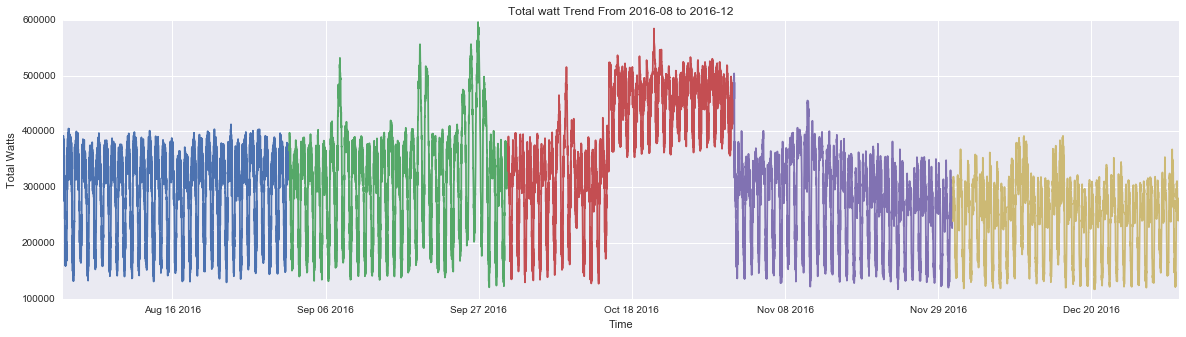

In [50]:
plt.figure(figsize=(20,5))
for i in complete_mon:
    temp=mon.get_group(i)    
    plt.plot(temp.index, temp.allsum)
plt.xlabel('Time')
plt.ylabel('Total Watts')
plt.title('Total watt Trend From 2016-08 to 2016-12')

# Peak: 
2016-08-24 01:00:00,  
2016-09-26 21:45:00,  
2016-10-21 00:30:00,  
2016-11-01 00:15:00, 
 
 
 2016-12-16 02:15:00

# Total Watt Trend in The Week Containing Peak Watts Day (2016-08-24 01:00:00) in Each Month

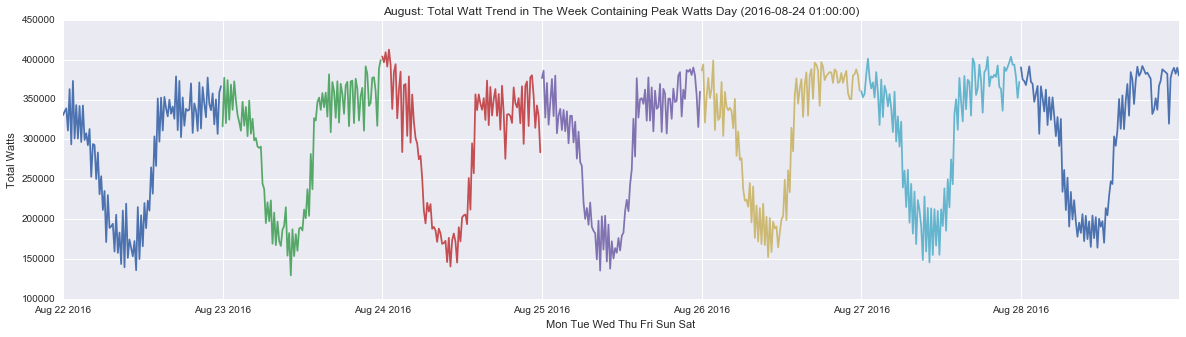

In [44]:
# August
i=0
aug=fifteen_min.ix['2016-08-22':'2016-08-28']
plt.figure(figsize=(20,5))
for j in range(1,8):
    temp=aug.iloc[i:96*j,:]
    plt.plot(temp.index, temp.allsum)
    i+=96
plt.xlabel('Mon Tue Wed Thu Fri Sun Sat')
plt.ylabel('Total Watts')
plt.title('August: Total Watt Trend in The Week Containing Peak Watts Day (2016-08-24 01:00:00)')

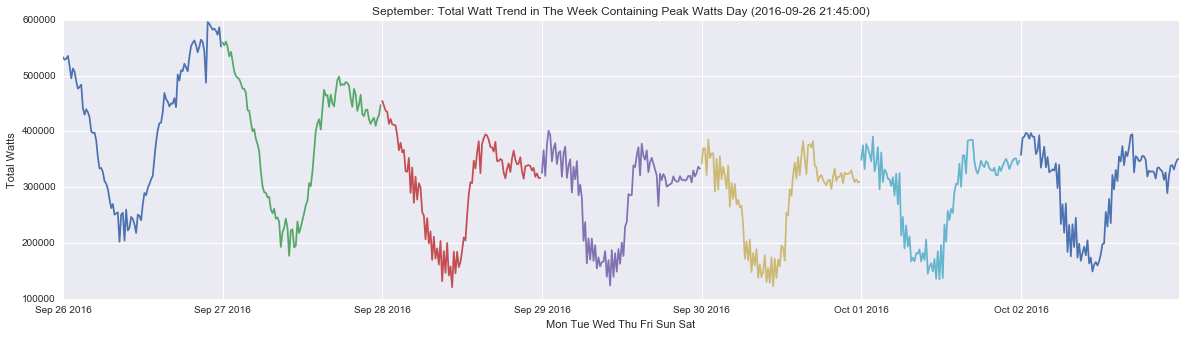

In [46]:
#September: Total Watt Trend in The Week Containing Peak Watts Day (2016-09-26 21:45:00)
i=0
sep=fifteen_min.ix['2016-09-26':'2016-10-02']
plt.figure(figsize=(20,5))
for j in range(1,8):
    temp=sep.iloc[i:96*j,:]
    plt.plot(temp.index, temp.allsum)
    i+=96
plt.xlabel('Mon Tue Wed Thu Fri Sun Sat')
plt.ylabel('Total Watts')
plt.title('September: Total Watt Trend in The Week Containing Peak Watts Day (2016-09-26 21:45:00)')

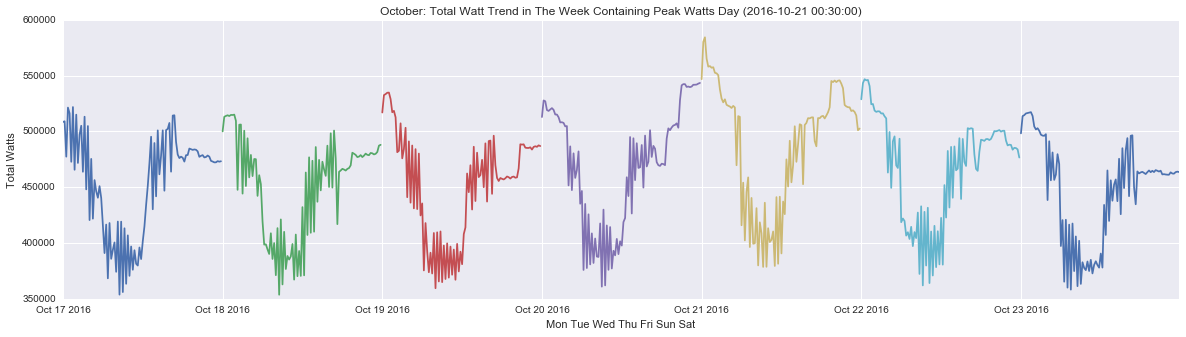

In [47]:
#October: Total Watt Trend in The Week Containing Peak Watts Day (2016-10-21 00:30:00)
i=0
octo=fifteen_min.ix['2016-10-17':'2016-10-23']
plt.figure(figsize=(20,5))
for j in range(1,8):
    temp=octo.iloc[i:96*j,:]
    plt.plot(temp.index, temp.allsum)
    i+=96
plt.xlabel('Mon Tue Wed Thu Fri Sun Sat')
plt.ylabel('Total Watts')
plt.title('October: Total Watt Trend in The Week Containing Peak Watts Day (2016-10-21 00:30:00)')

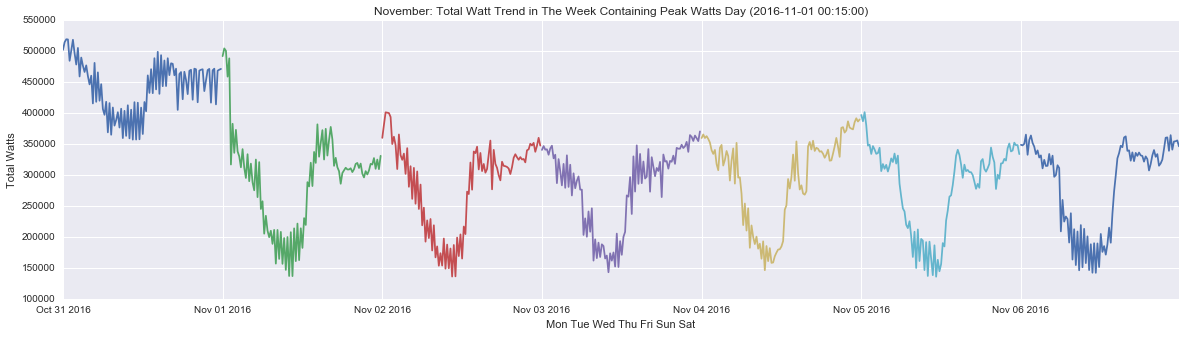

In [49]:
#November: Total Watt Trend in The Week Containing Peak Watts Day (2016-11-01 00:15:00)
i=0
nov=fifteen_min.ix['2016-10-31':'2016-11-06']
plt.figure(figsize=(20,5))
for j in range(1,8):
    temp=nov.iloc[i:96*j,:]
    plt.plot(temp.index, temp.allsum)
    i+=96
plt.xlabel('Mon Tue Wed Thu Fri Sun Sat')
plt.ylabel('Total Watts')
plt.title('November: Total Watt Trend in The Week Containing Peak Watts Day (2016-11-01 00:15:00)')

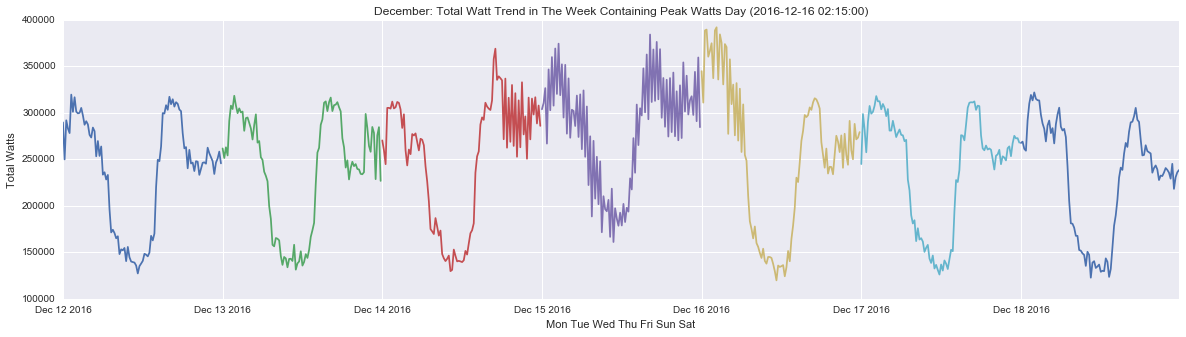

In [48]:
#December: Total Watt Trend in The Week Containing Peak Watts Day (2016-12-16 02:15:00)
i=0
dec=fifteen_min.ix['2016-12-12':'2016-12-18']
plt.figure(figsize=(20,5))
for j in range(1,8):
    temp=dec.iloc[i:96*j,:]
    plt.plot(temp.index, temp.allsum)
    i+=96
plt.xlabel('Mon Tue Wed Thu Fri Sun Sat')
plt.ylabel('Total Watts')
plt.title('December: Total Watt Trend in The Week Containing Peak Watts Day (2016-12-16 02:15:00)')

# Take peak in August 2016-08-24 as an example

In [102]:
aug=fifteen_min.ix['2016-08-24']
del aug['Weekday']
summary=aug.describe()
summary

,8576,8577,8578,8579,8580,8595,8596,8597,8604,8605,...,7151,7152,8565,8566,8567,8568,8570,8572,8575,allsum
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,38448.610995,41207.551804,17571.258862,13741.394049,15101.797330,34821.813441,43926.747462,36645.409327,4889.999734,5332.406643,...,72156.553967,69195.307795,65525.729420,85220.243818,64405.185141,277119.653361,284597.597651,278872.441078,38722.604546,294664.645882
std,756.126258,291.646642,9436.206978,9696.665767,6230.258674,2517.555939,3057.498670,2233.086447,85.241953,95.301750,...,22562.906187,19597.010127,34347.749943,44364.777381,31850.426945,125224.857240,126403.720052,124264.083196,913.066684,78585.894331
min,37199.996338,40800.000000,1396.785149,-1787.923772,5023.079407,32549.996338,42300.000000,34798.561035,4799.999542,5235.000000,...,16800.000000,21150.000000,15963.815918,21520.266479,18429.810303,71700.606689,74203.065430,74937.596680,36900.000000,140463.615076
25%,37799.996338,40950.000000,10720.377274,6137.602511,10116.956505,33450.000000,42599.996338,35100.000000,4824.618881,5249.999542,...,60286.205933,59363.142700,16746.483704,22299.036255,19697.218262,183602.884644,191948.904480,185351.965698,38250.000000,210368.395467
50%,38549.996338,41249.981079,16835.023626,12197.069191,14195.840424,34349.996338,42866.262329,36150.000000,4842.409119,5295.000000,...,80945.749756,76809.884399,87302.792480,115809.486816,84494.117798,261905.682129,266263.957397,263939.781250,38549.996338,321293.138155
75%,39000.000000,41399.996338,24749.998169,20720.109955,19869.973297,35100.000000,43499.996338,37199.996338,4957.880684,5398.166382,...,88414.131744,83099.936951,91290.334961,118035.125366,90931.675049,378302.375977,388541.230957,381301.986328,39454.742737,356668.597923
max,39899.996338,41700.044678,36900.000000,46473.424438,39887.283691,49447.754883,59400.000000,44249.996338,5039.999542,5504.999542,...,100725.916504,94129.767578,97411.035156,123640.367188,92949.649414,496772.054688,507564.484375,496478.375000,40499.996338,412618.359568


### standard error of each circuits during 2016-08-24

In [56]:
summary.ix['std'].sort_values(ascending=False)

8570      126403.720052
8568      125224.857240
8572      124264.083196
allsum     78585.894331
8608       67032.381249
8607       63119.581135
8609       63058.354356
8761       50068.106729
8566       44364.777381
7148       35641.543418
7142       34356.366430
8565       34347.749943
7149       32140.241228
7147       32089.962152
8567       31850.426945
7143       30787.049302
7141       30195.410602
7146       29229.699265
8763       27410.965745
7145       26327.947955
7128       25774.733281
7131       25166.981274
7137       24980.235742
7134       24773.108013
7135       24715.554161
7133       23857.540493
7127       23745.619465
7144       23542.477440
7130       23119.642867
7136       22738.572217
              ...      
8753       11323.675338
8762       11030.649467
8754       10318.789970
8579        9696.665767
8578        9436.206978
8580        6230.258674
8596        3057.498670
8595        2517.555939
8597        2233.086447
9407        1642.922812
8575         913

### median of each circuits during 2016-08-24

In [60]:
summary.ix['50%'].sort_values(ascending=False)[0:15]

allsum    321293.138155
8761      302213.853516
8570      266263.957397
8572      263939.781250
8568      261905.682129
8763      215210.492187
8762      205740.776367
8608      196500.000000
8607      183213.708008
8609      183000.000000
8566      115809.486816
7148      103573.561829
7149      101663.965515
7147       95649.708191
8620       90592.951172
Name: 50%, dtype: float64

### mean of each circuits during 2016-08-24

In [61]:
summary.ix['mean'].sort_values(ascending=False)[0:15]

allsum    294664.645882
8570      284597.597651
8572      278872.441078
8568      277119.653361
8761      271752.035126
8763      204459.713338
8762      203607.174998
8608      149004.855178
8607      137599.191384
8609      137256.997729
7148       87059.236225
7142       86178.493451
7149       85456.636361
8566       85220.243818
7143       83765.057320
Name: mean, dtype: float64

In [64]:
for i in summary.ix['std'].sort_values(ascending=False).index.values:
    print 'aug[\''+i+'\'],',

aug['8570'], aug['8568'], aug['8572'], aug['allsum'], aug['8608'], aug['8607'], aug['8609'], aug['8761'], aug['8566'], aug['7148'], aug['7142'], aug['8565'], aug['7149'], aug['7147'], aug['8567'], aug['7143'], aug['7141'], aug['7146'], aug['8763'], aug['7145'], aug['7128'], aug['7131'], aug['7137'], aug['7134'], aug['7135'], aug['7133'], aug['7127'], aug['7144'], aug['7130'], aug['7136'], aug['7151'], aug['7129'], aug['7138'], aug['7132'], aug['7150'], aug['8621'], aug['7152'], aug['9408'], aug['8619'], aug['8620'], aug['9409'], aug['8752'], aug['8753'], aug['8762'], aug['8754'], aug['8579'], aug['8578'], aug['8580'], aug['8596'], aug['8595'], aug['8597'], aug['9407'], aug['8575'], aug['8576'], aug['8577'], aug['8605'], aug['8604'], aug['8606'], aug['7126'], aug['7125'], aug['8756'], aug['8759'], aug['6996'], aug['8611'], aug['8610'], aug['8755'], aug['8612'], aug['8757'], aug['8758'], aug['8760'], aug['7140'], aug['7139'],


# Plot Watts Trend Of Each Circuit on 2016-08-24 After Aggreagation

## From bottom to top of the plot, the variance of the circuit decrease

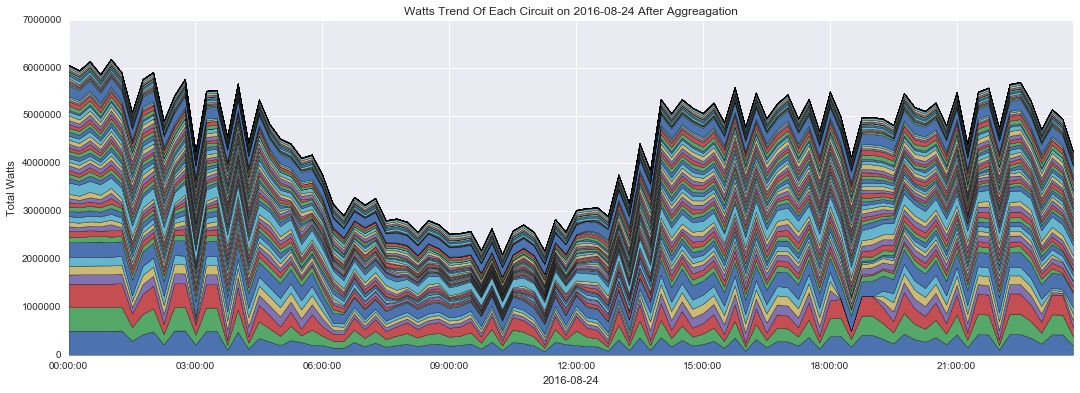

In [105]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
              aug['8570'], aug['8568'], aug['8572'], aug['8608'], aug['8607'], aug['8609'], aug['8761'], aug['8566'],\
             aug['7148'], aug['7142'], aug['8565'], aug['7149'], aug['7147'], aug['8567'], aug['7143'], aug['7141'], \
             aug['7146'], aug['8763'], aug['7145'], aug['7128'], aug['7131'], aug['7137'], aug['7134'], aug['7135'], \
             aug['7133'], aug['7127'], aug['7144'], aug['7130'], aug['7136'], aug['7151'], aug['7129'], aug['7138'], \
             aug['7132'], aug['7150'], aug['8621'], aug['7152'], aug['9408'], aug['8619'], aug['8620'], aug['9409'], \
             aug['8752'], aug['8753'], aug['8762'], aug['8754'], aug['8579'], aug['8578'], aug['8580'], aug['8596'], \
             aug['8595'], aug['8597'], aug['9407'], aug['8575'], aug['8576'], aug['8577'], aug['8605'], aug['8604'],\
             aug['8606'], aug['7126'], aug['7125'], aug['8756'], aug['8759'], aug['6996'], aug['8611'], aug['8610'], \
             aug['8755'], aug['8612'], aug['8757'], aug['8758'], aug['8760'], aug['7140'], aug['7139'],)

plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24 After Aggreagation')
plt.show()

### It is not easy to see the pattern with aggregarion, let's use the original data without aggregation.

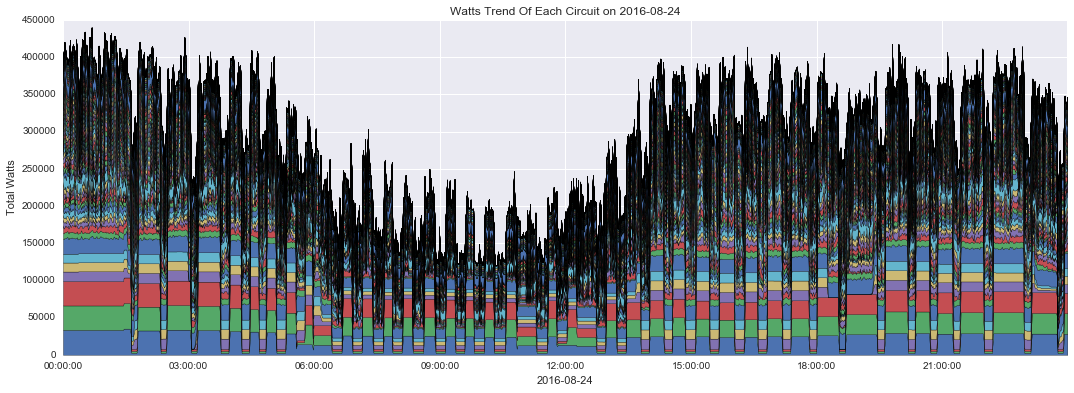

In [95]:
aug=original.ix['2016-08-24']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
              aug['8570'], aug['8568'], aug['8572'], aug['8608'], aug['8607'], aug['8609'], aug['8761'], aug['8566'],\
             aug['7148'], aug['7142'], aug['8565'], aug['7149'], aug['7147'], aug['8567'], aug['7143'], aug['7141'], \
             aug['7146'], aug['8763'], aug['7145'], aug['7128'], aug['7131'], aug['7137'], aug['7134'], aug['7135'], \
             aug['7133'], aug['7127'], aug['7144'], aug['7130'], aug['7136'], aug['7151'], aug['7129'], aug['7138'], \
             aug['7132'], aug['7150'], aug['8621'], aug['7152'], aug['9408'], aug['8619'], aug['8620'], aug['9409'], \
             aug['8752'], aug['8753'], aug['8762'], aug['8754'], aug['8579'], aug['8578'], aug['8580'], aug['8596'], \
             aug['8595'], aug['8597'], aug['9407'], aug['8575'], aug['8576'], aug['8577'], aug['8605'], aug['8604'],\
             aug['8606'], aug['7126'], aug['7125'], aug['8756'], aug['8759'], aug['6996'], aug['8611'], aug['8610'], \
             aug['8755'], aug['8612'], aug['8757'], aug['8758'], aug['8760'], aug['7140'], aug['7139'],)
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

### Let's only see the bottom 3 circuits: 8570, 8568, 8572

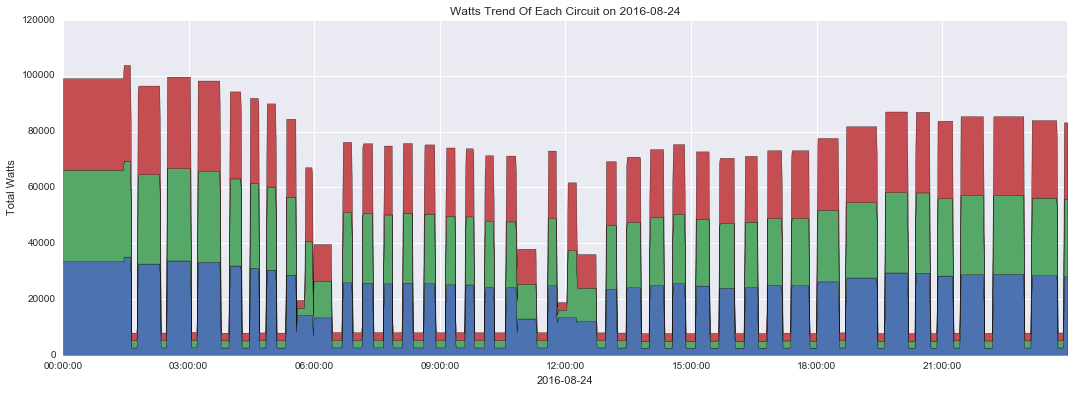

In [96]:
aug=original.ix['2016-08-24']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
              aug['8570'], aug['8568'], aug['8572'])
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

# The trend of these 3 circuits is highly related to the trend of the total watts. 
# In other words, the total watts of circuits 8570, 8568, 8572 is the most important factor that will form the trend of total watts and may cause a peak

# However, the next 4 circuits do not have as strong relationship as the previous 3 circuits with the total watt trend.

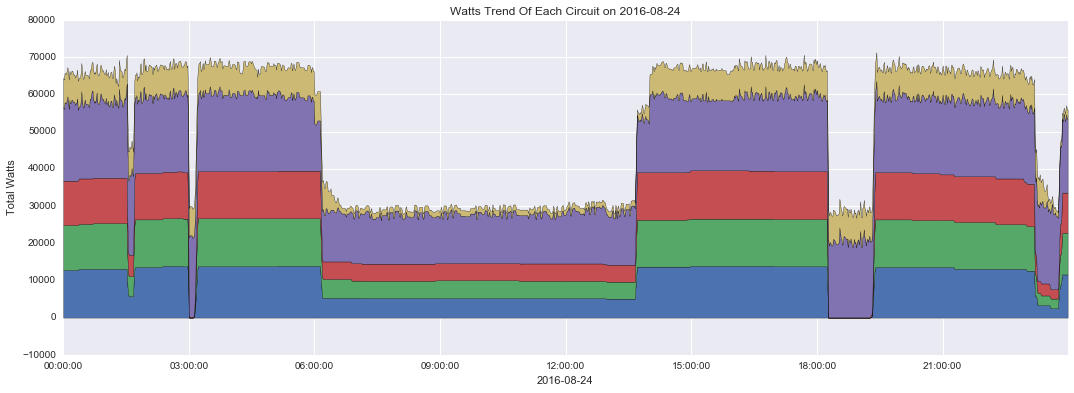

In [97]:
aug=original.ix['2016-08-24']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
             aug['8608'], aug['8607'], aug['8609'], aug['8761'],aug['8566'],)
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

# Let's zoom in to make it more clear

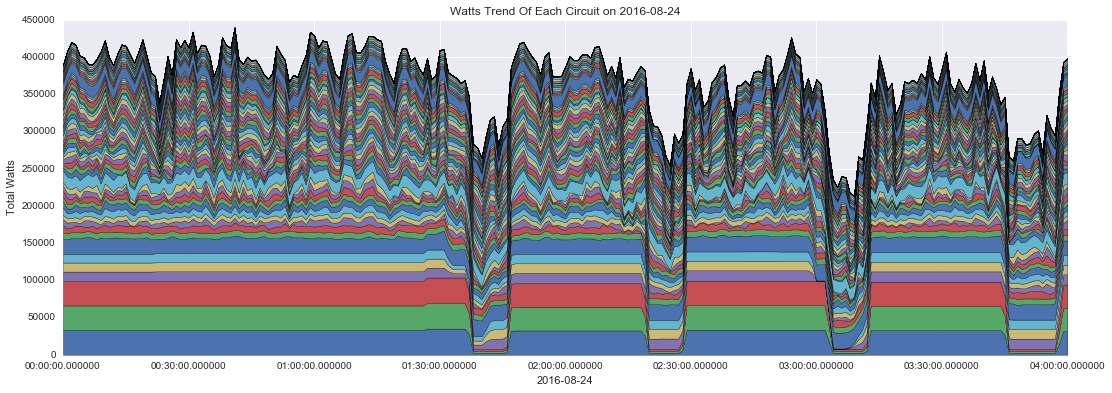

In [98]:
aug=original.ix['2016-08-24 00:00:00':'2016-08-24 04:00:00']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
              aug['8570'], aug['8568'], aug['8572'], aug['8608'], aug['8607'], aug['8609'], aug['8761'], aug['8566'],\
             aug['7148'], aug['7142'], aug['8565'], aug['7149'], aug['7147'], aug['8567'], aug['7143'], aug['7141'], \
             aug['7146'], aug['8763'], aug['7145'], aug['7128'], aug['7131'], aug['7137'], aug['7134'], aug['7135'], \
             aug['7133'], aug['7127'], aug['7144'], aug['7130'], aug['7136'], aug['7151'], aug['7129'], aug['7138'], \
             aug['7132'], aug['7150'], aug['8621'], aug['7152'], aug['9408'], aug['8619'], aug['8620'], aug['9409'], \
             aug['8752'], aug['8753'], aug['8762'], aug['8754'], aug['8579'], aug['8578'], aug['8580'], aug['8596'], \
             aug['8595'], aug['8597'], aug['9407'], aug['8575'], aug['8576'], aug['8577'], aug['8605'], aug['8604'],\
             aug['8606'], aug['7126'], aug['7125'], aug['8756'], aug['8759'], aug['6996'], aug['8611'], aug['8610'], \
             aug['8755'], aug['8612'], aug['8757'], aug['8758'], aug['8760'], aug['7140'], aug['7139'],)
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

### only see the bottom 3 circuits: 8570, 8568, 8572

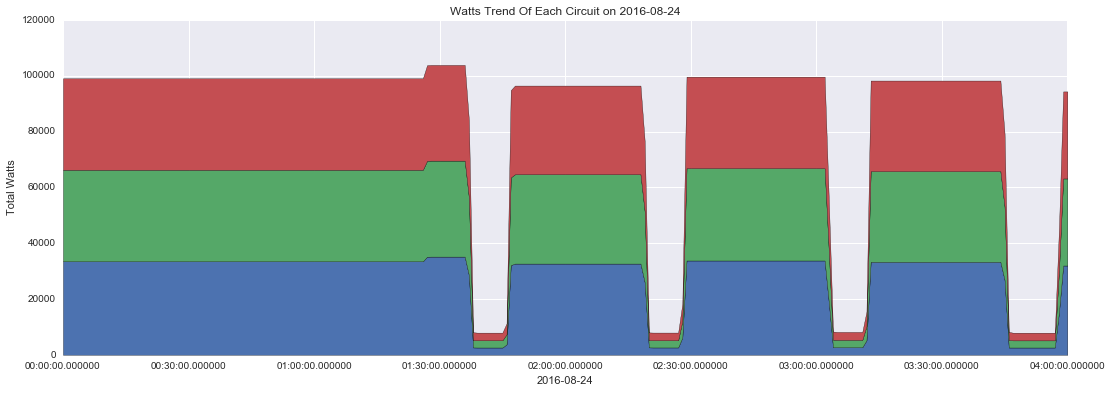

In [99]:
aug=original.ix['2016-08-24 00:00:00':'2016-08-24 04:00:00']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
              aug['8570'], aug['8568'], aug['8572'])
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

### next 4 circuits

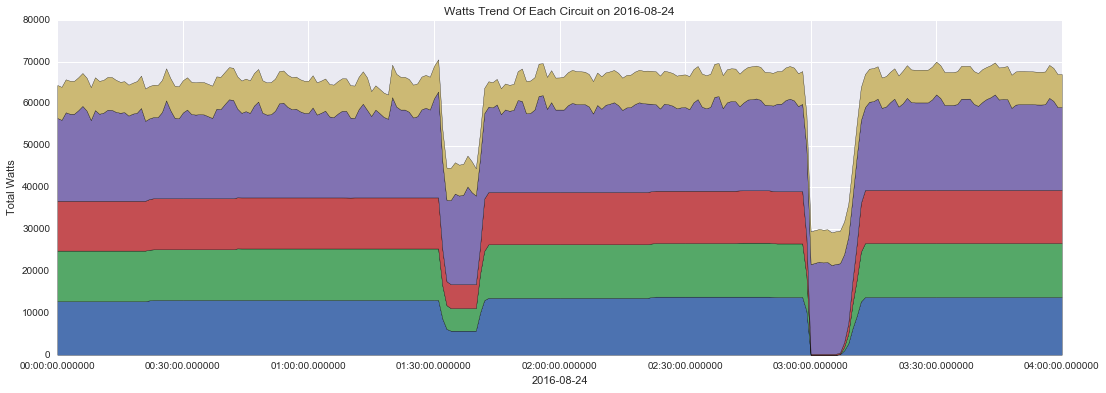

In [100]:
aug=original.ix['2016-08-24 00:00:00':'2016-08-24 04:00:00']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
             aug['8608'], aug['8607'], aug['8609'], aug['8761'],aug['8566'])
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

### add 7 circuits together

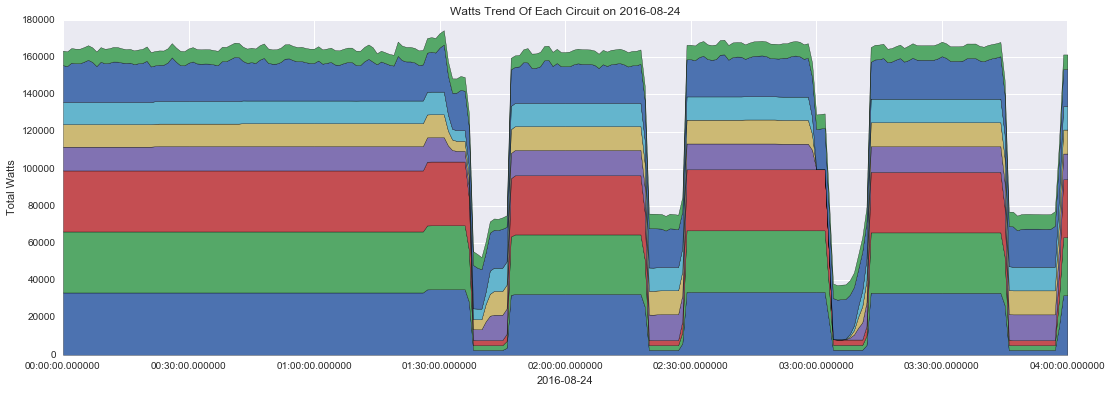

In [101]:
aug=original.ix['2016-08-24 00:00:00':'2016-08-24 04:00:00']
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.stackplot(aug.index,
             aug['8570'], aug['8568'], aug['8572'],aug['8608'], aug['8607'], aug['8609'], aug['8761'],aug['8566'])
plt.xlabel('2016-08-24')
plt.ylabel('Total Watts')
plt.title('Watts Trend Of Each Circuit on 2016-08-24')
plt.show()

## So, for peak analysis:
1. Total watts of circuits 8570, 8568, 8572 , have the largest impact on the total watts.

2. The peaks do not show strong relationship with weekdays and national holidays.  
3. But all happened between 21:45-02:15, which means more peaks often happens around 00:00:00.

# Part 2:  Peak forecast: ( Please see the attached R markdown file)

Can use ARIMA model, the time series techiniques to forecast the range of the total watts in next 15 mins

In [107]:
aug=fifteen_min.ix['2016-08-24']

In [109]:
aug.to_csv('aug.csv',sep=',')